In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

In [8]:
data = pd.read_csv('kc_house_data.csv') 
data.isnull().values.any()

False

In [9]:
# Dropping the numerically non-sensical variables 
dropColumns = ['id', 'date', 'zipcode'] 
data = data.drop(dropColumns, axis = 1) 

# Separating the dependent and independent variables 
y = data['price'] 
X = data.drop('price', axis = 1) 

# Dividing the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [10]:
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X_train, y_train) 

# Evaluating the Linear Regression model 
print(linearModel.score(X_test, y_test)) 

0.7038471478886595


In [ ]:
#Ridge(L2) Regression

In [11]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


0.25 : 69.09039943128884
0.5 : 69.09057554458555
0.75 : 69.09073194564492
1.0 : 69.09086883699763
1.25 : 69.09098641885294
1.5 : 69.09108488912979
1.75 : 69.09116444348747
2.0 : 69.09122527535538


In [12]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 

# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test)) 

0.7040417433266691


In [ ]:
#Lasso(L1) Regression

In [13]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 69.09020889338363
0.5 : 69.09021436304992
0.75 : 69.09021980337022
1.0 : 69.09022521931556
1.25 : 69.09023060760678
1.5 : 69.09023596857334
1.75 : 69.09024130374362
2.0 : 69.09024661093869


In [14]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 

# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, y_test)) 

0.7038521283874354


In [ ]:
 #Comparing and Visualizing the results

In [15]:
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score(X_test, y_test), 
        ridgeModelChosen.score(X_test, y_test), 
        lassoModelChosen.score(X_test, y_test)] 

# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 

# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

Linear Regreesion : 0.7038471478886595
Ridge Regreesion : 0.7040417433266691
Lasso Regression : 0.7038521283874354


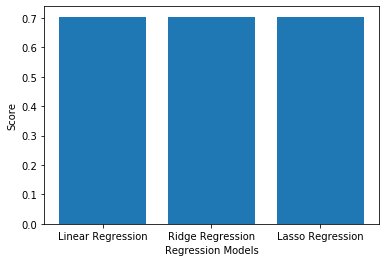

In [16]:
# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 